In [78]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import csv

In [79]:
# Ex 1
def fereastra_dreptanghiulara(dimensiune):
    return 1

def fereastra_hanning(dimensiune, despartiri):
    indice = np.linspace(0, dimensiune, despartiri)
    return 0.5 * (1 - np.cos(2 * np.pi * indice / dimensiune))

In [80]:
fereastra_dreptanghiulara(32)

1

In [81]:
frecventa = 100
amplitudine = 1 
faza = 0
dimensiune = 200
timp = np.linspace(0, dimensiune, 10000)

def sinus(amplitude, frequency, phase, time):
    return amplitude * np.sin(2 * np.pi * frequency * time + phase)

semnal = sinus(amplitudine, frecventa, faza, timp)

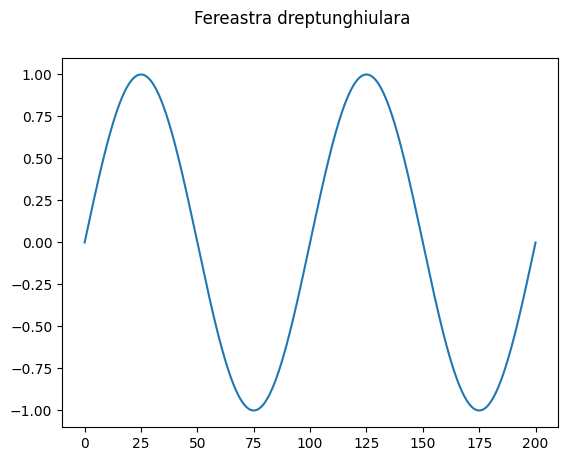

In [82]:
plt.plot(timp, semnal * fereastra_dreptanghiulara(dimensiune))
plt.suptitle("Fereastra dreptunghiulara")
plt.show()

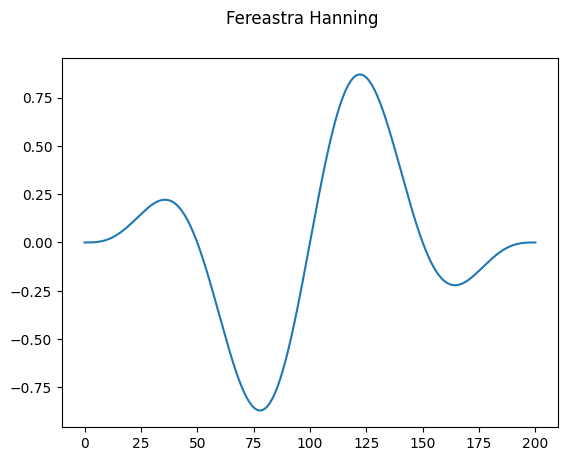

In [83]:
plt.plot(timp, semnal * fereastra_hanning(dimensiune, 10000))
plt.suptitle("Fereastra Hanning")
plt.show()

In [85]:
# Ex 2
counts = []
for d in csv.DictReader(open('Train.csv'), delimiter=','):
    counts.append(int(d['Count']))

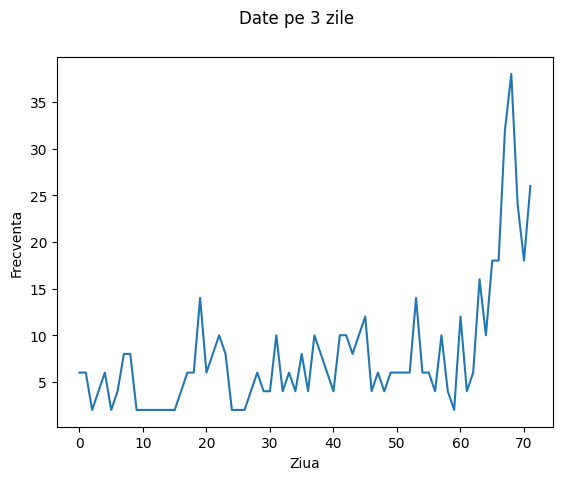

In [90]:
# a)
plt.suptitle("Date pe 3 zile")
plt.plot(counts[1000:1072]) #72 ore = 3 zile * 24 ore/zi
plt.xlabel('Ziua')
plt.ylabel('Frecventa')
plt.show()

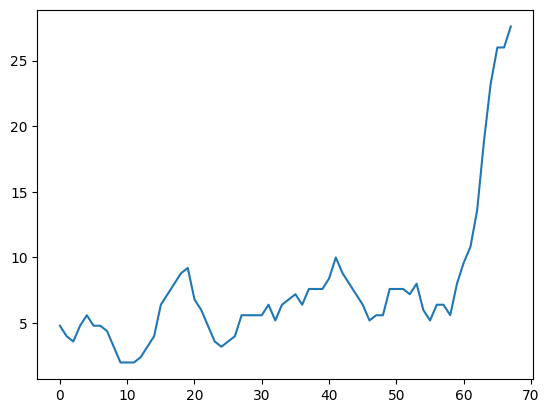

In [92]:
#b)
figura = np.convolve(counts[1000:1072], np.ones(5), "valid") / 5
plt.plot(figura)
plt.show()

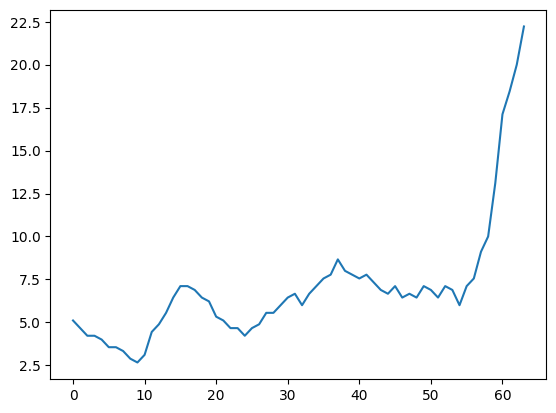

In [93]:
figura = np.convolve(counts[1000:1072], np.ones(9), "valid") / 9
plt.plot(figura)
plt.show()

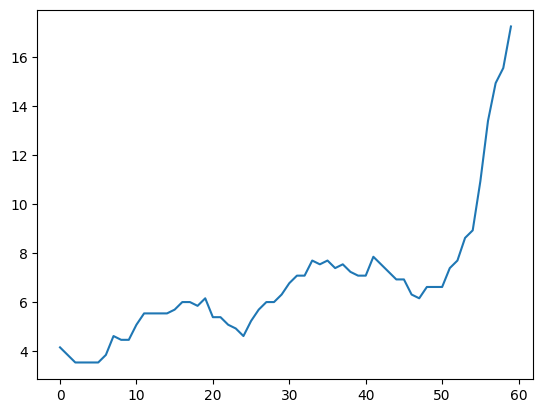

In [94]:
figura = np.convolve(counts[1000:1072], np.ones(13), "valid") / 13
plt.plot(figura)
plt.show()

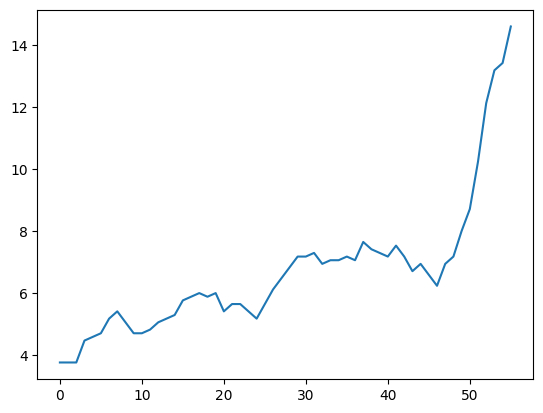

In [95]:
figura = np.convolve(counts[1000:1072], np.ones(17), "valid") / 17
plt.plot(figura)
plt.show()

In [99]:
#c)
fs = 1/3600 # 1h = 3600s = 1/3600 Hz
nyquist = fs / 2 
trece_jos = fs / 4
print(trece_jos, "Hz")

#Normalizarea
trece_jos = trece_jos / nyquist
print("Frecventa de taiere este", trece_jos, "* nyquist")

6.944444444444444e-05 Hz
Frecventa de taiere este 0.5 * nyquist


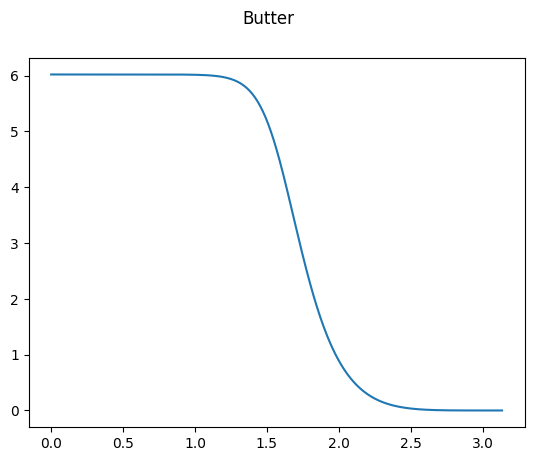

In [106]:
#d)
butter_b, butter_a = scipy.signal.butter(5, trece_jos, btype="low")
chebby_b, chebby_a = scipy.signal.cheby1(5, 5, trece_jos, btype="low")

butter_w, butter_h = scipy.signal.freqz(butter_b, butter_a)
plt.plot(butter_w, 20 * np.log10(np.abs(butter_h) + 1))
plt.suptitle("Butter")
plt.show()

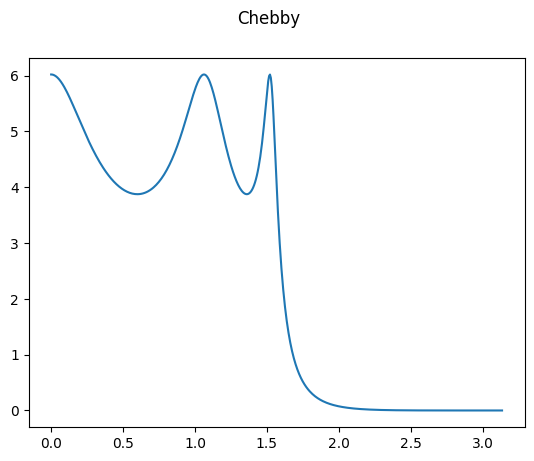

In [107]:
chebby_w, chebby_h = scipy.signal.freqz(chebby_b, chebby_a)
plt.plot(chebby_w, 20 * np.log10(np.abs(chebby_h) + 1))
plt.suptitle("Chebby")
plt.show()

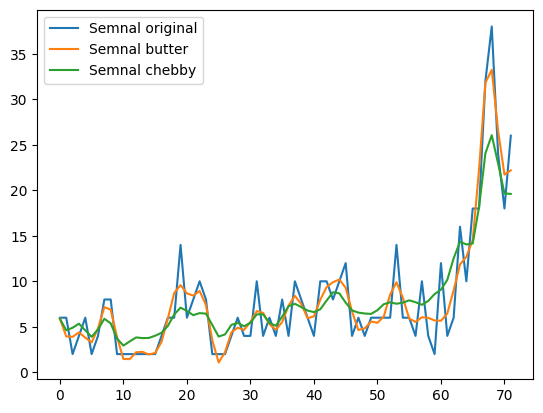

In [111]:
#e)
butter_y = scipy.signal.filtfilt(butter_b, butter_a, counts)
chebby_y = scipy.signal.filtfilt(chebby_b, chebby_a, counts)

plt.plot(counts[1000:1072], label='Semnal original')
plt.plot(butter_y[1000:1072], label='Semnal butter')
plt.plot(chebby_y[1000:1072], label='Semnal chebby')
plt.legend()
plt.show()